In [13]:
import pandas as pd

%matplotlib inline

In [3]:
df_scoring_mi = pd.read_pickle('pickle/scoring_mi.pickle')
df_birthdates = pd.read_pickle('pickle/birth_dates.pickle')

In [4]:
df_scoring_mi.head()

,,firstName,lastName,pos,tmID,GP,G,A,Pts,SOG
playerID,year,,,,,,,,,
abrahth01,1980,Thommy,Abrahamsson,D,HAR,32.0,6.0,11.0,17.0,66.0
actonke01,1980,Keith,Acton,C,MTL,61.0,15.0,24.0,39.0,101.0
adamsgr01,1980,Greg,Adams,L,PHI,6.0,3.0,0.0,3.0,6.0
alleyst01,1980,Steve,Alley,L,HAR,8.0,2.0,2.0,4.0,10.0
allismi01,1980,Mike,Allison,L,NYR,75.0,26.0,38.0,64.0,122.0


In [5]:
df_birthdates.head()

birthDate
1948-07-10    reschgl01
1950-01-27    bublaji01
1950-07-12    melocgi01
1950-11-13    perregi01
1950-12-12    bouchda01
Freq: D, Name: playerID, dtype: object

In [8]:
wayne = df_scoring_mi.loc['gretzwa01']
wayne.head()

,firstName,lastName,pos,tmID,GP,G,A,Pts,SOG
year,,,,,,,,,
1980,Wayne,Gretzky,C,EDM,80.0,55.0,109.0,164.0,261.0
1981,Wayne,Gretzky,C,EDM,80.0,92.0,120.0,212.0,369.0
1982,Wayne,Gretzky,C,EDM,80.0,71.0,125.0,196.0,348.0
1983,Wayne,Gretzky,C,EDM,74.0,87.0,118.0,205.0,324.0
1984,Wayne,Gretzky,C,EDM,80.0,73.0,135.0,208.0,358.0


In [10]:
sums = wayne.groupby(level=0)["G", "A"].sum()
sums.head()

,G,A
year,,
1980,55.0,109.0
1981,92.0,120.0
1982,71.0,125.0
1983,87.0,118.0
1984,73.0,135.0


In [11]:
means = sums.rolling(3)["G"].mean()
means.head()

year
1980          NaN
1981          NaN
1982    72.666667
1983    83.333333
1984    77.000000
Name: G, dtype: float64

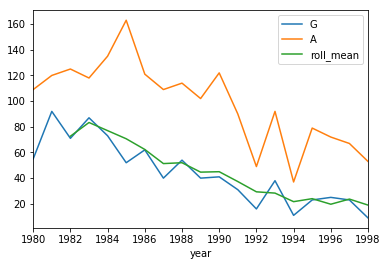

In [14]:
sums.assign(roll_mean = means).plot();

In [15]:
means = sums.rolling(3, min_periods=1)["G"].mean()
means.head()

year
1980    55.000000
1981    73.500000
1982    72.666667
1983    83.333333
1984    77.000000
Name: G, dtype: float64

In [17]:
means = sums.rolling(3, center=True).mean()
means.head()

,G,A
year,,
1980,NaN,NaN
1981,72.666667,118.000000
1982,83.333333,121.000000
1983,77.000000,126.000000
1984,70.666667,138.666667


In [18]:
triang_goals_sum = sums['G'].rolling(3,
                                     win_type='triang',
                                       center=True).sum()
sums.assign(triang = triang_goals_sum).head()

,G,A,triang
year,,,
1980,55.0,109.0,NaN
1981,92.0,120.0,155.0
1982,71.0,125.0,160.5
1983,87.0,118.0,159.0
1984,73.0,135.0,142.5


In [20]:
quarter_counts = df_birthdates.resample('Q').count()
quarter_counts.rolling(4).sum().head(10)

birthDate
1948Q3    NaN
1948Q4    NaN
1949Q1    NaN
1949Q2    1.0
1949Q3    0.0
1949Q4    0.0
1950Q1    1.0
1950Q2    1.0
1950Q3    2.0
1950Q4    5.0
Freq: Q-DEC, Name: playerID, dtype: float64

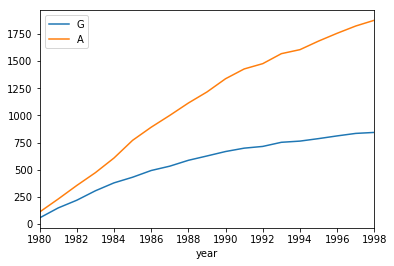

In [21]:
sums.expanding().sum().plot();

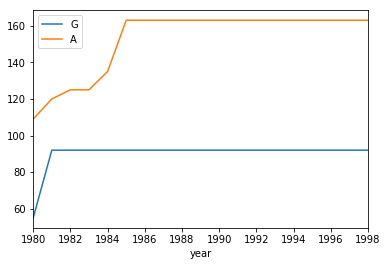

In [22]:
sums.expanding().max().plot();

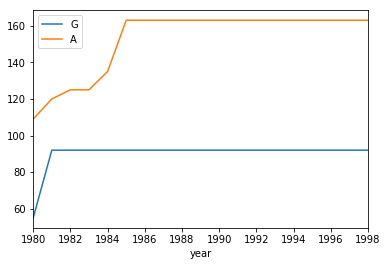

In [23]:
sums.cummax().plot();

In [24]:
totals = sums.sum()
totals

G     843.0
A    1877.0
dtype: float64

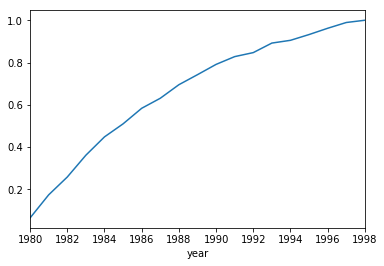

In [25]:
total_part = sums['G'].expanding().aggregate(lambda x:
                                          x.sum() / totals['G'])
total_part.plot();